<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/CNN/Improving_Cats_and_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2021-03-19 18:16:39--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.60.72.32, 2600:1409:8800:188::e59, 2600:1409:8800:180::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.60.72.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   125MB/s    in 6.8s    

2021-03-19 18:16:46 (115 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
local_zip='/tmp/cats-and-dogs.zip'

In [4]:
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [6]:
to_create = [
    '/tmp/cats-v-dogs',
    '/tmp/cats-v-dogs/training',
    '/tmp/cats-v-dogs/testing',
    '/tmp/cats-v-dogs/training/cats',
    '/tmp/cats-v-dogs/training/dogs',
    '/tmp/cats-v-dogs/testing/cats',
    '/tmp/cats-v-dogs/testing/dogs'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/tmp/cats-v-dogs created
/tmp/cats-v-dogs/training created
/tmp/cats-v-dogs/testing created
/tmp/cats-v-dogs/training/cats created
/tmp/cats-v-dogs/training/dogs created
/tmp/cats-v-dogs/testing/cats created
/tmp/cats-v-dogs/testing/dogs created


In [7]:
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs')))

0
0


In [8]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [9]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [10]:
from tensorflow.keras import layers

model=tf.keras.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [11]:
training_dir='/tmp/cats-v-dogs/training'
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
train_generator=train_datagen.flow_from_directory(
    training_dir,
    batch_size=64,
    class_mode='binary',
    target_size=(150,150)
)

Found 22499 images belonging to 2 classes.


In [13]:
VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2499 images belonging to 2 classes.


In [14]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [15]:
import warnings
warnings.filterwarnings('ignore')
print('warnings ignored')

history=model.fit_generator(train_generator,epochs=15,
                            verbose=1,
                            validation_data=validation_generator)

warnings ignored
Epoch 1/15
352/352 [==============================] - 208s 497ms/step - loss: 0.7462 - acc: 0.5493 - val_loss: 0.6235 - val_acc: 0.6527
Epoch 2/15
352/352 [==============================] - 173s 493ms/step - loss: 0.6250 - acc: 0.6589 - val_loss: 0.7130 - val_acc: 0.6279
Epoch 3/15
352/352 [==============================] - 173s 490ms/step - loss: 0.5818 - acc: 0.6924 - val_loss: 0.5569 - val_acc: 0.7203
Epoch 4/15
352/352 [==============================] - 173s 492ms/step - loss: 0.5563 - acc: 0.7193 - val_loss: 0.5330 - val_acc: 0.7435
Epoch 5/15
352/352 [==============================] - 172s 489ms/step - loss: 0.5420 - acc: 0.7279 - val_loss: 0.5488 - val_acc: 0.7071
Epoch 6/15
352/352 [==============================] - 173s 492ms/step - loss: 0.5245 - acc: 0.7337 - val_loss: 0.5061 - val_acc: 0.7487
Epoch 7/15
352/352 [==============================] - 173s 490ms/step - loss: 0.5147 - acc: 0.7489 - val_loss: 0.5012 - val_acc: 0.7507
Epoch 8/15
352/352 [===========

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [22]:
acc


[0.5924707651138306,
 0.6674074530601501,
 0.7034534811973572,
 0.7178096771240234,
 0.7306991219520569,
 0.7401662468910217,
 0.7492333054542542,
 0.7592337727546692,
 0.7696786522865295,
 0.7712787389755249,
 0.7793235182762146,
 0.781101405620575,
 0.7877238988876343,
 0.7912351489067078,
 0.7891461849212646]

<Figure size 432x288 with 0 Axes>

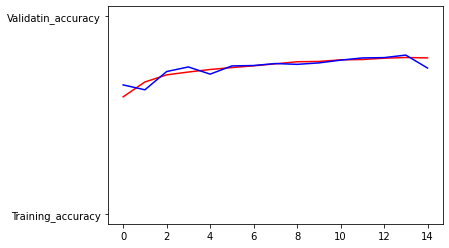

<Figure size 432x288 with 0 Axes>

In [24]:
epochs=range(len(acc))

plt.plot(epochs,acc,'r','Training_accuracy')
plt.plot(epochs,val_acc,'b','Validatin_accuracy')
plt.figure()

Text(0.5, 1.0, 'Training and Validation loss')

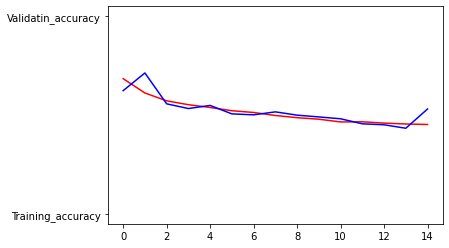

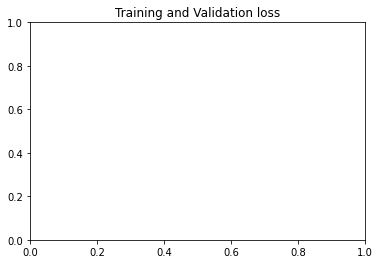

In [25]:
plt.plot(epochs,loss,'r','Training_accuracy')
plt.plot(epochs,val_loss,'b','Validatin_accuracy')
plt.figure()
plt.title('Training and Validation loss')